In [45]:
import new_adventure as na
import new_adventure.derivative_free_estimation as dfe
import numpy as np
import matplotlib.pyplot as plt
import time
from jax import random as jrandom
import jax.numpy as jnp
import jax 
import pandas as pd
from tqdm import tqdm 

%load_ext autoreload
%autoreload 2


%matplotlib inline
plt.rcParams['figure.figsize'] = [16,8]
plt.style.use('ggplot')
plt.rcParams['lines.markersize'] = 8


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# High Dimensional

In [49]:
def second_beta_smoothing(F, x_0, N, alpha, jrandom_key):
    jrandom_key, subkey = jrandom.split(jrandom_key)
    sample_points, radius = dfe.jax_hit_run(x_0, F, 1, N, alpha - 2, subkey)

    out_points = F.f(sample_points)
    diff = sample_points - x_0

    est = diff.T.dot(out_points.reshape(-1, 1) * diff)

    return 1/float(N) * (2*alpha - 3)*(2*alpha - 1)/(2*(alpha-2)*radius**4) * (est*(2*alpha - 3) - radius**2 * jnp.sum(out_points))

def old_second_beta_smoothing(F, x_0, N, alpha, jrandom_key):
    jrandom_key, subkey = jrandom.split(jrandom_key)
    sample_points, radius = dfe.jax_hit_run(x_0, F, 1, N, alpha-2, subkey)
    out_points = F.f(sample_points)
#     print("mean old new", jnp.mean(sample_points))
    diff = sample_points - x_0

    est = diff.T.dot(out_points.reshape(-1, 1) * diff)
    
    return [est/N, F.f(x_0.reshape(1, -1))[0]*diff.T.dot(diff) / N, ((diff ** 2).T.dot(diff**2)/N), np.mean(out_points).reshape(-1), np.mean(sample_points)] # 2*(-1 + 2*alpha)*(est * (2*alpha - 3) - radius**2 * jnp.sum(out_points))/(3*radius**4) / float(N)


def trial_beta(F, x_0, N, alpha, jrandom_key):
    jrandom_key, subkey = jrandom.split(jrandom_key)
    sample_points, radius = dfe.jax_hit_run(x_0, F, 1, N, alpha, subkey)
    sample_points = jnp.concatenate([sample_points, 2*x_0-sample_points])
    out_points = F.f(sample_points)
#     print("mean old new", jnp.mean(sample_points))
    diff = sample_points - x_0

    est = 2*(jnp.mean(out_points) - F.f(x_0.reshape(1, -1))) / (diff.T.dot(diff)/(len(diff)))
    
    return [est, diff.T.dot(diff)] #[est/N, F.f(x_0.reshape(1, -1))[0]*diff.T.dot(diff) / N, ((diff ** 2).T.dot(diff**2)/N), np.mean(out_points).reshape(-1), np.mean(sample_points)] # 2*(-1 + 2*alpha)*(est * (2*alpha - 3) - radius**2 * jnp.sum(out_points))/(3*radius**4) / float(N)



est_res = []
est_res_new = []
xs = jnp.array([0.9])

print(F.f2(xs.reshape(1, -1)))

for _ in range(1000):
    jrandom_key, subkey = jrandom.split(jrandom_key)
    est_res_new.append(dfe.beta_second_shift_estimator(F, xs, 1000, 100, subkey)) # trial_beta(F, xs, 10, 100, subkey))
#     est_res.append(old_second_beta_smoothing(F, xs, 2500, 50, subkey))

est_res_new = jnp.array(est_res_new).reshape(-1, 2)

# est_res = np.array(est_res).reshape(-1, 5)

[[[199.99991]]]


(array([  1.,   4.,  17.,  38.,  77., 118., 113.,  95.,  31.,   6.]),
 array([-5310.608  , -4400.795  , -3490.9824 , -2581.1694 , -1671.3567 ,
         -761.54395,   148.26884,  1058.0817 ,  1967.8944 ,  2877.7073 ,
         3787.52   ], dtype=float32),
 <a list of 10 Patch objects>)

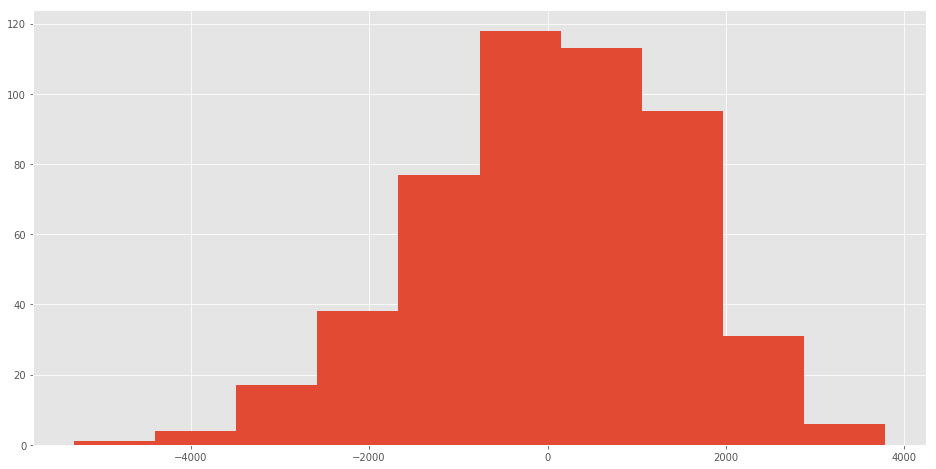

In [50]:
plt.hist(est_res_new[:, 0])

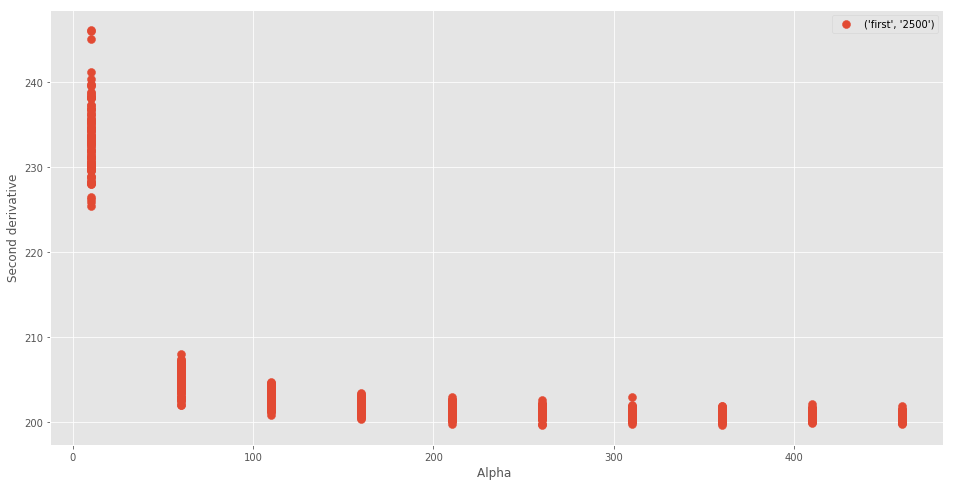

In [78]:
for k in res:
    if k in ["smoothing", "simple_zeroth", "multi_zeroth"]:
        continue
    x = []
    y = []
    K = [[],[]]
    for alpha, N in res[k]:
        if res[k][(alpha, N)] == []:
            continue
       
        K[0].append([alpha]*len(res[k][(alpha, N)]))
        K[1].append(res[k][(alpha, N)])
#     print(k)
#     print(N)
#         print(alpha)
#     print(K[0])
    plt.scatter(jnp.array(K[0]).reshape(-1), jnp.array(K[1]).reshape(-1), label=(k, str(N)))
    
plt.legend()
# plt.ylim(-200, 600)
plt.xlabel("Alpha ")
plt.ylabel("Second derivative")
plt.show()

In [74]:
def second_beta_smoothing(F, x_0, N, alpha, jrandom_key):
    jrandom_key, subkey = jrandom.split(jrandom_key)
    sample_points, radius = dfe.jax_hit_run(x_0, F, 1, N, alpha - 2, subkey)

    out_points = F.f(sample_points)
    diff = sample_points - x_0

    est = diff.T.dot(out_points.reshape(-1, 1) * diff)

    return 1/float(N) * (2*alpha - 3)*(2*alpha - 1)/(2*(alpha-2)*radius**4) * (est*(2*alpha - 3) - radius**2 * jnp.sum(out_points))

def old_second_beta_smoothing(F, x_0, N, alpha, jrandom_key):
    jrandom_key, subkey = jrandom.split(jrandom_key)
    sample_points, radius = dfe.jax_hit_run(x_0, F, 1, N, alpha-2, subkey)

    out_points = F.f(sample_points)
#     print("mean old new", jnp.mean(sample_points))
    diff = sample_points - x_0

    est = diff.T.dot(out_points.reshape(-1, 1) * diff)
    
    return 2*(-1 + 2*alpha)*(est * (2*alpha - 3) - radius**2 * jnp.sum(out_points))/(3*radius**4) / float(N)
    
xs = jnp.array([0.9])

res2 = {"smoothing":{}, "simple_zeroth": {}, "multi_zeroth": {}, "first": {}}
jitted_old_beta = jax.jit(lambda alpha, N, subkey: dfe.beta_second_shift_estimator(F, xs, alpha, N, subkey), static_argnums=(0, 1))
jitted_multi_beta = jax.jit(lambda alpha, N, subkey: dfe.new_beta_second_shift_estimator(F, xs, alpha, N, subkey), static_argnums=(0, 1))

for alpha in tqdm(range(50, 55, 50)):
    for N in range(100, 5000, 500):
        print(N)
        for k in res2:
            res2[k][(alpha, N)] = []
        for _ in range(100):
            jrandom_key, subkey = jrandom.split(jrandom_key)
    #         a = second_beta_smoothing(F, xs, 1000, alpha, subkey)[0][0]
            b = old_second_beta_smoothing(F, xs, N, alpha, subkey)[0][0]

            # print(F.f2(xs.reshape(1, 1)))
            d = jitted_multi_beta(alpha, N, subkey)[0][0]

            c = jitted_old_beta(alpha, N, subkey)[0][0]

    #         res["smoothing"][-1].append(a)
            res2["simple_zeroth"][(alpha, N)].append(b)
            res2["multi_zeroth"][(alpha, N)].append(c)
            res2["first"][(alpha, N)].append(d)







  0%|          | 0/1 [00:00<?, ?it/s]

100
600
1100
1600
2100
2600
3100
3600
4100
4600







100%|██████████| 1/1 [01:39<00:00, 99.32s/it]

100
600
1100
1600
2100
2600
3100
3600
4100
4600
100
600
1100
1600
2100
2600
3100
3600
4100
4600


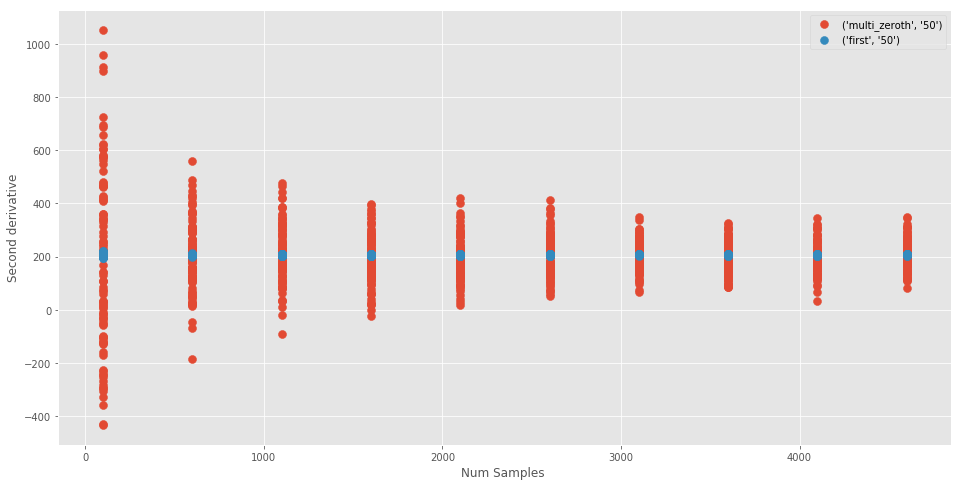

In [77]:
for k in res2:
    if k in ["smoothing", "simple_zeroth"]:
        continue
    x = []
    y = []
    K = [[],[]]
    for alpha, N in res2[k]:
        print(N)
        if res2[k][(alpha, N)] == []:
            continue

        K[0].append([N]*len(res2[k][(alpha, N)]))
        K[1].append(res2[k][(alpha, N)])
#     print(k)
#     print(N)
#         print(alpha)
#     print(K[0])
    plt.scatter(jnp.array(K[0]).reshape(-1), jnp.array(K[1]).reshape(-1), label=(k, str(alpha)))
    
plt.legend()
# plt.ylim(-200, 600)
plt.xlabel("Num Samples ")
plt.ylabel("Second derivative")
plt.show()

In [187]:
np.random.seed(10)
dim = 100
num_barriers = dim * 2
dirs = np.random.normal(size=(num_barriers, dim)) # sample gaussian and normalize 
ws = dirs/np.linalg.norm(dirs, axis=1).reshape(-1, 1)
bs = np.ones(num_barriers)

jrandom_key = jrandom.PRNGKey(0)

xs = np.ones(dim) / np.linalg.norm(np.ones(dim))

# num_barriers = 6
# dim = 3
# dirs = np.random.normal(size=(num_barriers, dim)) # sample gaussian and normalize 
# ws = dirs/np.linalg.norm(dirs, axis=1).reshape(-1, 1)
# bs = np.ones(num_barriers)

barrier = na.Barriers.LogPolytopeBarrier(ws, bs)

F = na.Functions.Linear(np.ones(dim))

F = barrier # na.Functions.LinearCombination(F, barrier, [1, 1])

In [208]:
errs_inv_first = []
errs_inv_zeroth = []
errs_zeroth = []
# errs_fd = []
a = []
b = []
xs = np.ones(dim) / np.linalg.norm(np.ones(dim))
num_steps = 100
delta = 10
int_start, int_end = -1, 1
vals = []
hess_vals = []
for x in np.linspace(int_start, int_end, num_steps):
    xs[0] = x
    
    vals.append(F.f(np.array([xs])))
    
    
    true_hess = F.f2(np.array([xs]))
    est_first_hess = dfe.new_beta_second_shift_estimator(F, xs, 10, 1000, jrandom_key) 
    est_zeroth_hess = dfe.beta_second_shift_estimator(F, xs, 1000, 10000, jrandom_key)

    est_inv_first_hess = np.linalg.inv(est_first_hess)
    est_inv_zeroth_hess = get_low_rank_matrix_inverse(est_zeroth_hess, 1) # np.linalg.inv((est_zeroth_hess))
    true_inv_hess = get_low_rank_matrix_inverse(true_hess[0], 1) # np.linalg.inv(true_hess)
    
    errs_inv_first.append(np.linalg.norm(est_inv_first_hess - true_inv_hess)/np.linalg.norm(true_inv_hess))
    errs_inv_zeroth.append(np.linalg.norm(est_inv_zeroth_hess - true_inv_hess)/np.linalg.norm(true_inv_hess))
    errs_zeroth.append(np.linalg.norm(jnp.diag(est_zeroth_hess) - jnp.diag(true_hess[0]))/np.linalg.norm(jnp.diag(true_hess[0])))



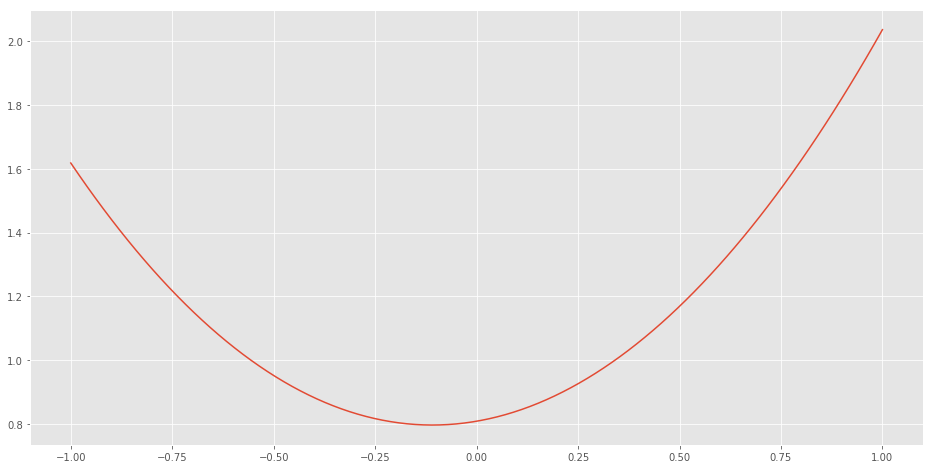

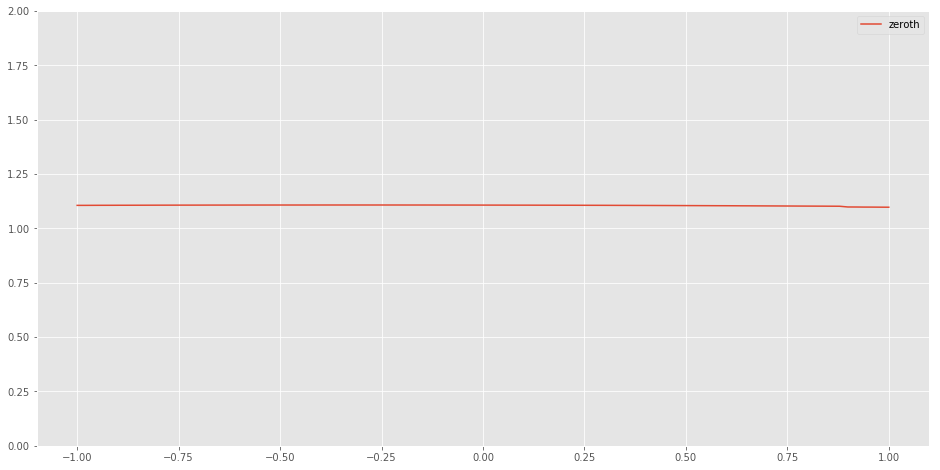

In [204]:
plt.plot(np.linspace(int_start, int_end, num_steps), vals)
plt.show()

# plt.plot(np.linspace(int_start, int_end, num_steps), hess_vals)
# plt.show()

# plt.plot(np.linspace(int_start, int_end, num_steps), errs, label="first")
plt.plot(np.linspace(int_start, int_end, num_steps), errs_inv_zeroth, label="zeroth")
# plt.plot(np.linspace(int_start, int_end, num_steps), errs_fd, label="Finite Difference")
plt.legend()

plt.ylim(0, 2)

plt.show()

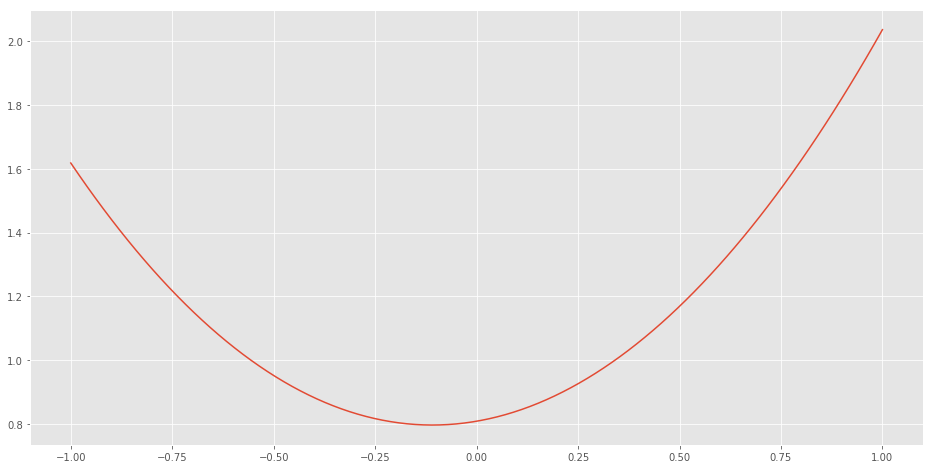

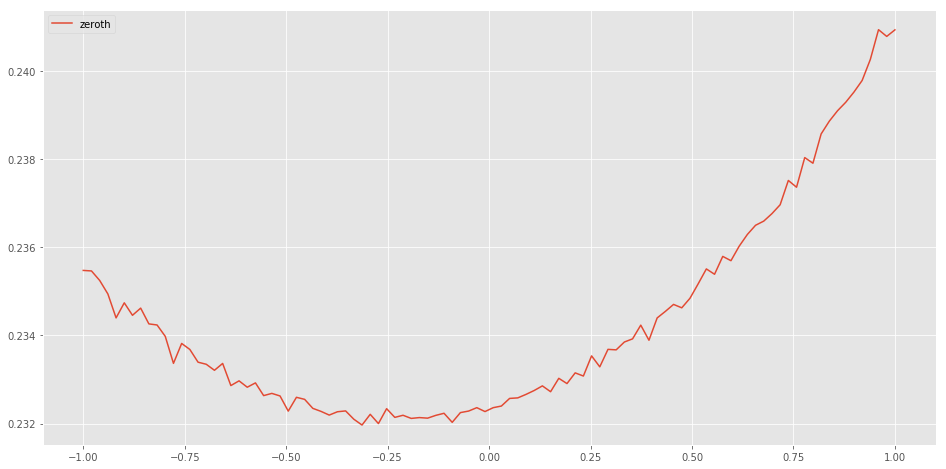

In [209]:
plt.plot(np.linspace(int_start, int_end, num_steps), vals)
plt.show()

# plt.plot(np.linspace(int_start, int_end, num_steps), hess_vals)
# plt.show()

# plt.plot(np.linspace(int_start, int_end, num_steps), errs, label="first")
plt.plot(np.linspace(int_start, int_end, num_steps), errs_zeroth, label="zeroth")
# plt.plot(np.linspace(int_start, int_end, num_steps), errs_fd, label="Finite Difference")
plt.legend()

# plt.ylim(0, 2)

plt.show()

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [161]:
def get_low_rank_matrix_inverse(A, cutoff):
    
    U, S, V = jnp.linalg.svd(A)
    
    S_inv = 1/S
    S_inv = jnp.where(S < cutoff, 0, S_inv)

    return U.dot(jnp.diag(S_inv)).dot(V)

In [157]:
get_low_rank_matrix_inverse(zeroth_hess, 10)

True
[0.01624593 0.06511583 0.        ]


DeviceArray([[ 0.05149108, -0.00063269,  0.02387173],
             [-0.00064482,  0.00765449,  0.00893133],
             [ 0.02387769,  0.00894044,  0.02221618]], dtype=float32)

In [158]:
get_low_rank_matrix_inverse(F.f2(xs.reshape(1, -1))[0], 10)

True
[0.01937394 0.06053324 0.        ]


DeviceArray([[ 0.01584566, -0.01363492,  0.01598236],
             [-0.01363493,  0.01281311, -0.00759174],
             [ 0.01598236, -0.00759174,  0.05124839]], dtype=float32)

In [178]:
jrandom_key, subkey = jrandom.split(jrandom_key)


zeroth_hess = dfe.beta_second_shift_estimator(F, xs, 1000, 500, jrandom_key)
zeroth_inv_hess = jnp.linalg.inv(zeroth_hess)
print("Zeroth Hess: \n", zeroth_hess)
print("True Hess: \n", F.f2(xs.reshape(1, -1))[0])
print()

print("Zeroth Hess SVD: \n", jnp.linalg.svd(zeroth_hess))
print("True Hess SVD: \n", jnp.linalg.svd(F.f2(xs.reshape(1, -1))[0]))
print("=========")

print("Zeroth Inverse Hess: \n", zeroth_inv_hess)
print("True Inverse Hess: \n", F.f2_inv(xs.reshape(1, -1))[0])
print()
print("Zeroth Hess Inverse SVD: \n", jnp.linalg.svd(zeroth_inv_hess))
print("True Hess Inverse SVD: \n", jnp.linalg.svd(F.f2_inv(xs.reshape(1, -1))[0]))

Zeroth Hess: 
 [[ 2.4191153   1.2145588   1.6062527  -1.166391   -8.727021    2.658104
  -5.194991   -5.312643    6.3035946  -5.130804  ]
 [ 1.2145588   2.3351412  -1.0672759  -0.07041705 -0.4245704  -0.5868536
   0.3983751  -1.0634378  -1.9550148  -1.2012335 ]
 [ 1.6061584  -1.0672759   5.117839   -0.23388068 -0.5659371   2.1577187
  -5.3637347  -0.6465723   1.7346314  -4.789609  ]
 [-1.1661474  -0.07033055 -0.23388068  2.834672    5.670962    0.89546376
   3.4328902   1.2838502  -4.627425    1.8005718 ]
 [-8.727021   -0.42419547 -0.56570613  5.671735    2.889513    0.23335247
   4.273855    3.5120912  -5.557302    1.0394245 ]
 [ 2.658104   -0.5869159   2.1573436   0.89546376  0.23323317  3.0027313
  -4.610164   -5.151421    1.4044363  -2.22392   ]
 [-5.194991    0.39824957 -5.3637347   3.433683    4.2738957  -4.610164
   4.713161    0.9413762  -1.2851652  -0.2597827 ]
 [-5.312643   -1.0634378  -0.6467948   1.2839223   3.5122561  -5.1523995
   0.9413762   0.42919016 -4.2192106   1.521

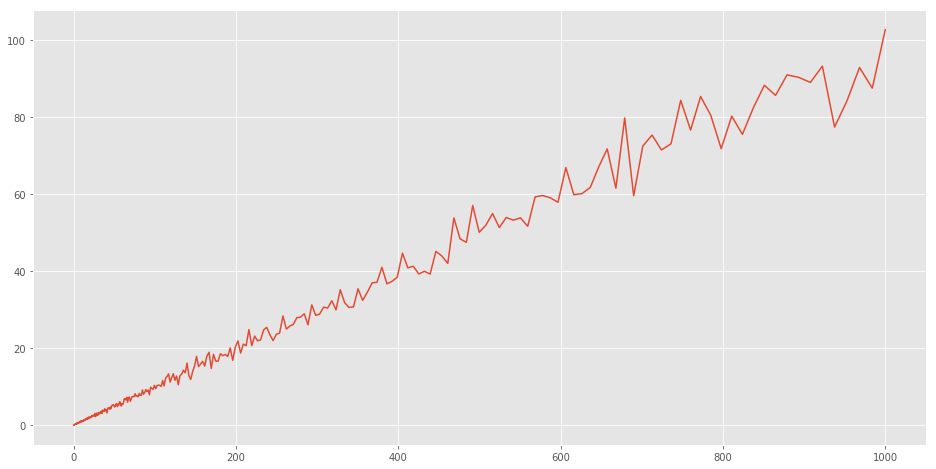

In [230]:
res = []
N = 100
num_runs = 100
for s in np.logspace(-4, 3, 1000):
    curr_terms = []
    for _ in range(num_runs):
        curr_terms.append((np.mean(np.random.normal(scale=s, size=(N))))**2)
    res.append(np.mean(curr_terms)**0.5)

plt.plot(np.logspace(-4, 3, 1000), res)

In [110]:
xs[0] = -0.5

res = []
res_inv = []

for _ in range(100):
    jrandom_key, subkey = jrandom.split(jrandom_key)
    
#     a = F.f2(xs.reshape(1, -1))
    b = dfe.beta_second_shift_estimator(F, xs, 1000, 500, jrandom_key)
    
    res.append(b[0])
    
#     a_inv = jnp.linalg.inv(a)
    b_inv = jnp.linalg.inv(b)
    
    res_inv.append(b_inv[0])

#     print(a)
#     print(b)

# print(np.linalg.norm(a_inv - b_inv)/np.linalg.norm(a_inv))
# print(np.linalg.norm(a - b)/np.linalg.norm(a))

res = jnp.array(res)
res_inv = jnp.array(res_inv)

20.397062
0.46988186


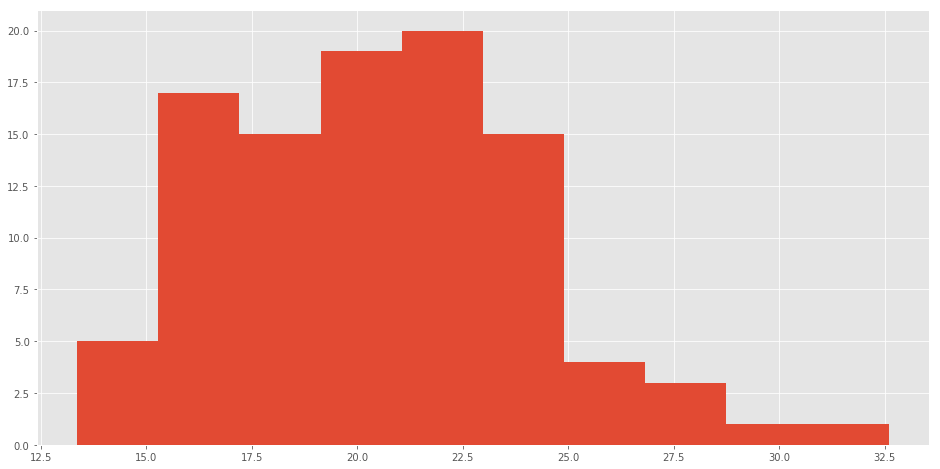

(array([ 1.,  0.,  4., 92.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([-6.8612356, -4.8234496, -2.7856631, -0.747877 ,  1.2899091,
         3.3276954,  5.3654814,  7.403268 ,  9.441054 , 11.47884  ,
        13.516626 ], dtype=float32),
 <a list of 10 Patch objects>)

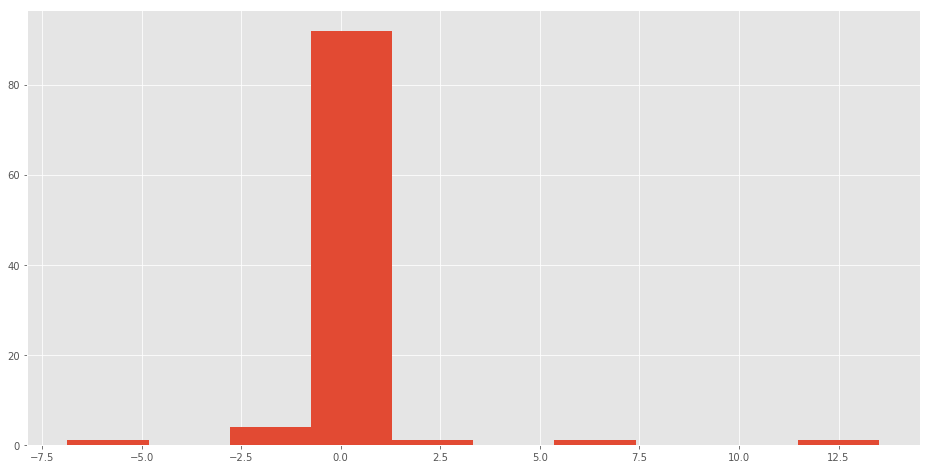

In [112]:
print(F.f2(xs.reshape(1, -1))[0][0, 0])
print(F.f2_inv(xs.reshape(1, -1))[0][0,0])
plt.hist(res[:, 0])
plt.show()
plt.hist(res_inv[:, 0])

-21.36767
0.42404217


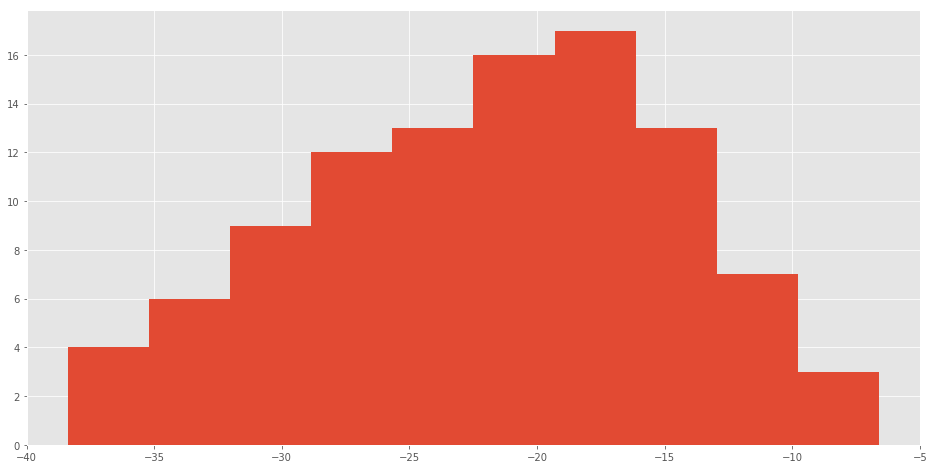

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  4., 13., 30., 26.,  6.,
         5.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-3.90084910e+00, -3.73793197e+00, -3.57501483e+00, -3.41209793e+00,
        -3.24918079e+00, -3.08626366e+00, -2.92334652e+00, -2.76042938e+00,
        -2.59751248e+00, -2.43459535e+00, -2.27167821e+00, -2.10876107e+00,
        -1.94584405e+00, -1.78292692e+00, -1.62000990e+00, -1.45709276e+00,
        -1.29417574e+00, -1.13125861e+00, -9.68341529e-01, -8.05424452e-01,
        -6.42507374e-01, -4.79590267e-01, -3.16673189e

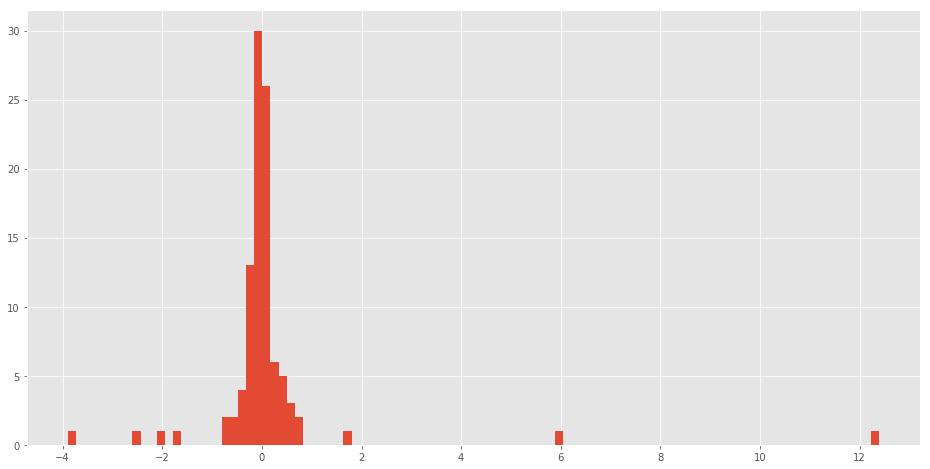

In [116]:
print(F.f2(xs.reshape(1, -1))[0][0, 1])
print(F.f2_inv(xs.reshape(1, -1))[0][0,1])

plt.hist(res[:, 1])
plt.show()
plt.hist(res_inv[:, 1], bins=100)


# Plot Barrier

In [390]:
np.random.seed(10)
num_barriers = 4
dim = 2
dirs = np.random.normal(size=(num_barriers, dim)) # sample gaussian and normalize 
ws = dirs/np.linalg.norm(dirs, axis=1).reshape(-1, 1)
bs = np.ones(num_barriers)
barrier = na.Barriers.LogPolytopeBarrier(ws, bs)

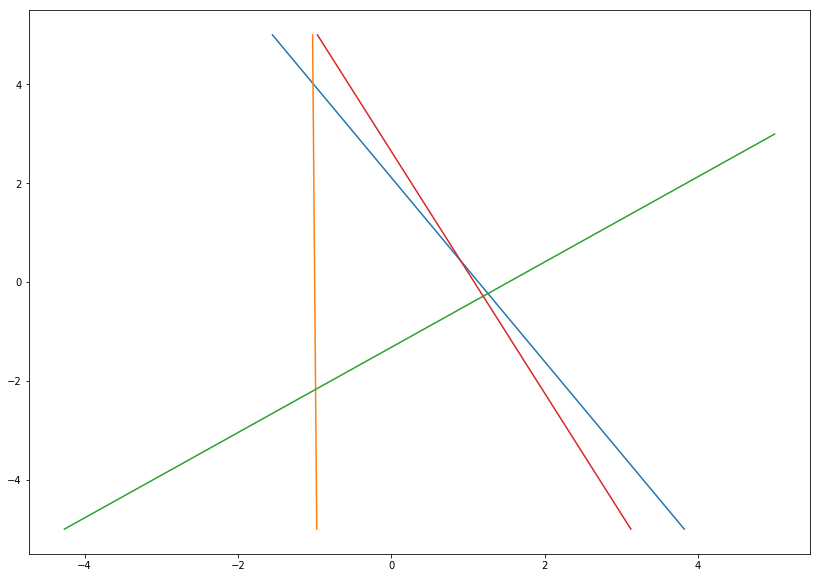

In [391]:
figure_size = (14, 10)
fig = plt.figure(figsize=figure_size)
ax = fig.add_subplot(1, 1, 1)
na.animations.draw_polytope(barrier.ws, barrier.bs, 5, ax)
# ax.scatter(ys[:, 0], ys[:, 1])
# plt.xlim(-0.6, 0.6)
# plt.ylim(-0.6, 0.6)

# for i in range(len(dirs)):
#     ax.plot([xs[0][0], xs[0][0] + min(dists[i]) * dirs[i][0]], [xs[0][1], xs[0][1] + min(dists[i]) * dirs[i][1]])